<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [168]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [169]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [170]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



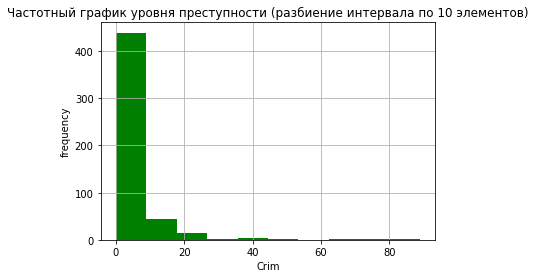

In [172]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(data['CRIM'], 10, facecolor='g')
# sns.distplot(data['CRIM'])
plt.xlabel('Crim')
plt.ylabel('frequency')
plt.title('Частотный график уровня преступности (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

#экспоненциальное распределение 

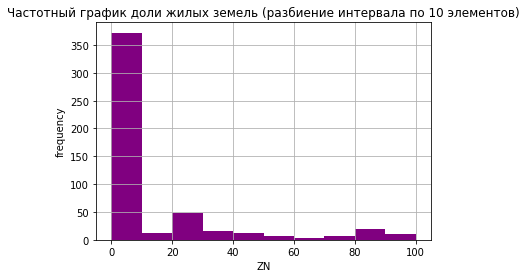

In [177]:
n, bins, patches = plt.hist(data['ZN'], 10, facecolor='purple')
plt.xlabel('ZN')
plt.ylabel('frequency')
plt.title('Частотный график доли жилых земель (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#экспоненциальное распределение

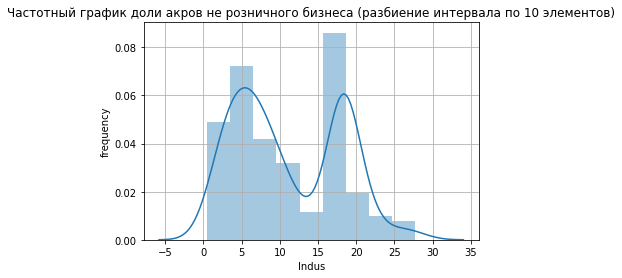

In [58]:
# n, bins, patches = plt.hist(data['INDUS'], 10, facecolor='navy')
sns.distplot(data['INDUS'])
plt.xlabel('Indus')
plt.ylabel('frequency')
plt.title('Частотный график доли акров не розничного бизнеса (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#бимодальное распределение

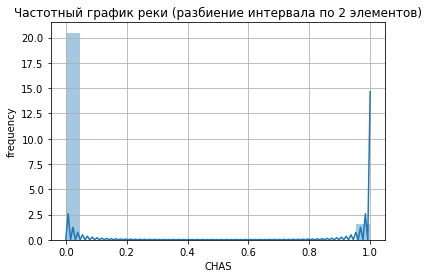

In [178]:
# n, bins, patches = plt.hist(data['CHAS'], 2, facecolor='orange')
sns.distplot(data['CHAS'])
plt.xlabel('CHAS')
plt.ylabel('frequency')
plt.title('Частотный график реки (разбиение интервала по 2 элементов)')
plt.grid(True)
plt.show()
# распредление Бернули

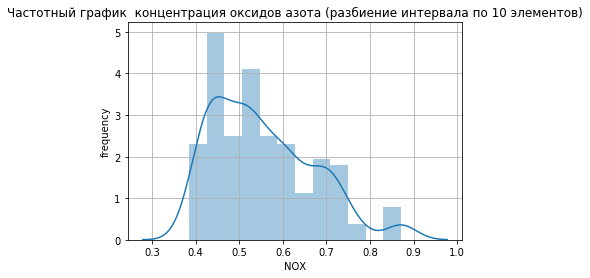

In [62]:
# n, bins, patches = plt.hist(data['NOX'], 10, facecolor='coral')
sns.distplot(data['NOX'])
plt.xlabel('NOX')
plt.ylabel('frequency')
plt.title('Частотный график  концентрация оксидов азота (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#возможно биномиальное распределение

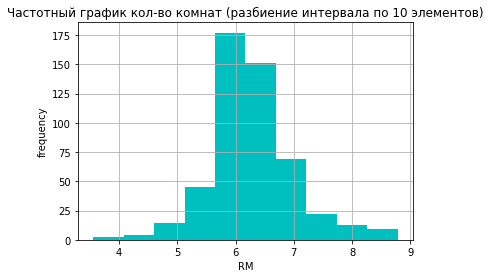

In [17]:
n, bins, patches = plt.hist(data['RM'], 10, facecolor='c')
plt.xlabel('RM')
plt.ylabel('frequency')
plt.title('Частотный график кол-во комнат (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#нормальное распределение или биномиальное

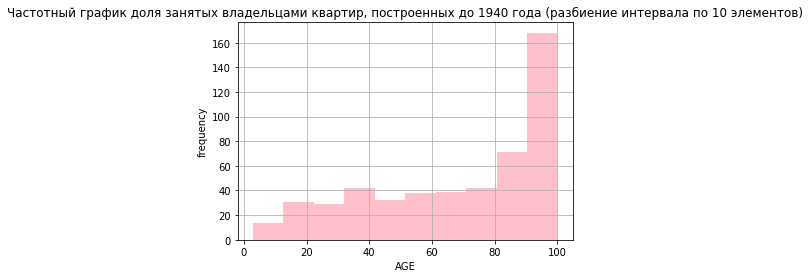

In [19]:
n, bins, patches = plt.hist(data['AGE'], 10, facecolor='pink')
plt.xlabel('AGE')
plt.ylabel('frequency')
plt.title('Частотный график доля занятых владельцами квартир, построенных до 1940 года (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#экспоненциальное распределение

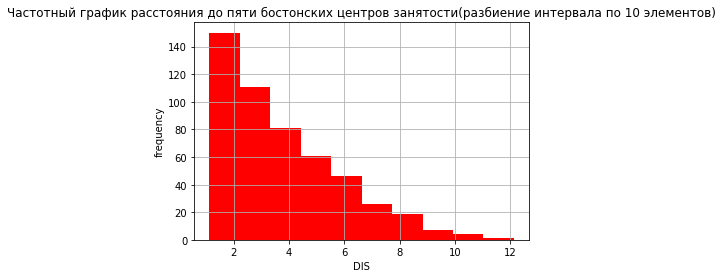

In [20]:
n, bins, patches = plt.hist(data['DIS'], 10, facecolor='r')
plt.xlabel('DIS')
plt.ylabel('frequency')
plt.title('Частотный график расстояния до пяти бостонских центров занятости(разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#экспоненциальное распределние

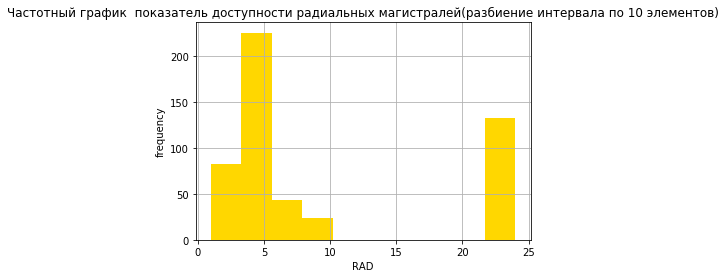

In [21]:
n, bins, patches = plt.hist(data['RAD'], 10, facecolor='gold')
plt.xlabel('RAD')
plt.ylabel('frequency')
plt.title('Частотный график  показатель доступности радиальных магистралей(разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#биномиальное распределение

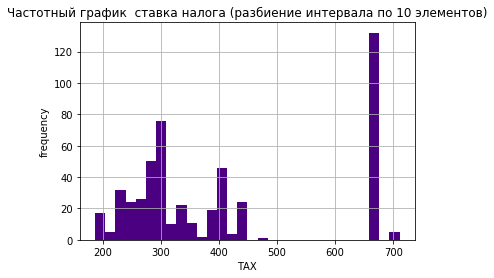

In [24]:
n, bins, patches = plt.hist(data['TAX'], 30, facecolor='indigo')
plt.xlabel('TAX')
plt.ylabel('frequency')
plt.title('Частотный график  ставка налога (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#биномиальное распредление

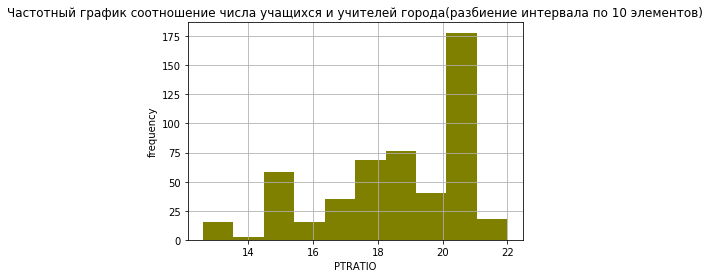

In [25]:
n, bins, patches = plt.hist(data['PTRATIO'], 10, facecolor='olive')
plt.xlabel('PTRATIO')
plt.ylabel('frequency')
plt.title('Частотный график соотношение числа учащихся и учителей города(разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#возможно биномиальное (если учесть ,что есть определенный диапазон)

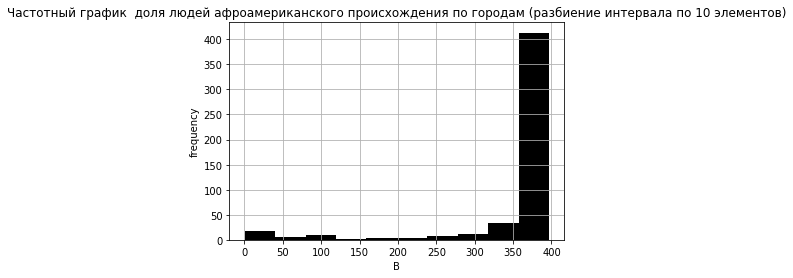

In [26]:
n, bins, patches = plt.hist(data['B'], 10, facecolor='k')
plt.xlabel('B')
plt.ylabel('frequency')
plt.title('Частотный график  доля людей афроамериканского происхождения по городам (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#экспоненциальное

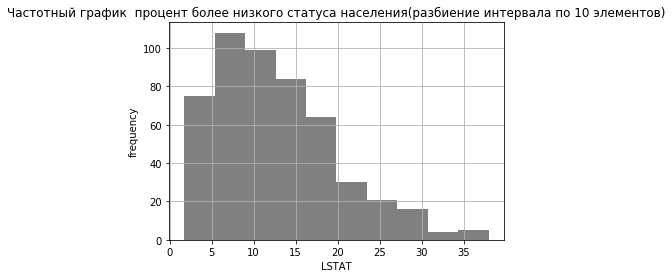

In [27]:
n, bins, patches = plt.hist(data['LSTAT'], 10, facecolor='gray')
plt.xlabel('LSTAT')
plt.ylabel('frequency')
plt.title('Частотный график  процент более низкого статуса населения(разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#логнормальное распределение

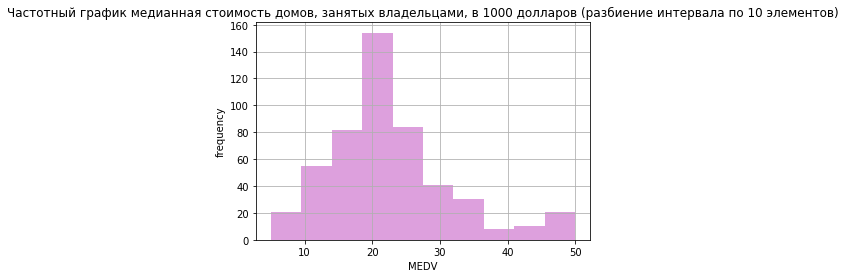

In [28]:
n, bins, patches = plt.hist(data['MEDV'], 10, facecolor='plum')
plt.xlabel('MEDV')
plt.ylabel('frequency')
plt.title('Частотный график медианная стоимость домов, занятых владельцами, в 1000 долларов (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#нормальное распределние с небольшим смещением

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

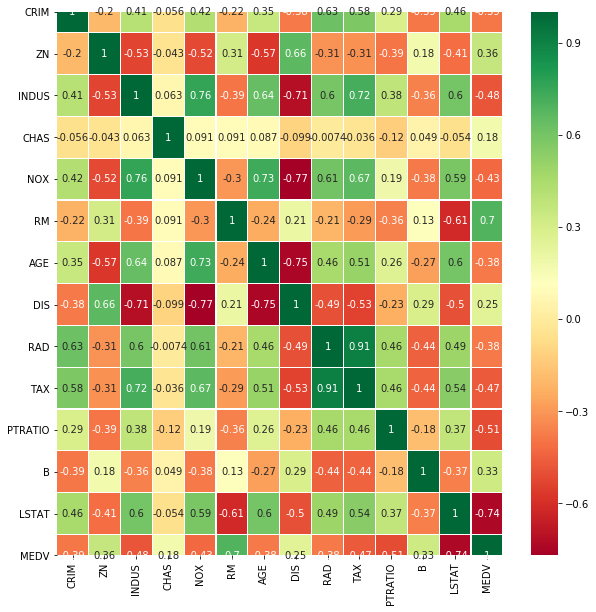

In [30]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

#максимальная прямая корреляция с ценой на дом у атрибута кол-во комнат (RM)
#максимальная обратная корреляция с ценой у дома у атрибута процент более низкого статуса населения (LSTAT)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [72]:
# Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array
medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

In [73]:
# Разделить данные на 80% тренировочных, 20% тестовых
from sklearn.linear_model import LinearRegression
model = LinearRegression()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2
)

In [74]:
# Составить модель линейной регрессии

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
predicted_y = model.predict(X_test)

In [78]:
# Посчитать ошибку модели на тестовых данных
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

27.33081510697362
4.078730716936326


In [95]:
model.score(X_test, y_test)  #ошибка

0.5148984980744651

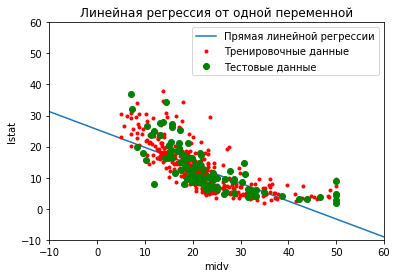

In [94]:
plt.xlabel('midv')
plt.ylabel('lstat')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-20, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [96]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [97]:
data.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [103]:
#отсутствующие значения
data.isnull().sum()
#в country нет пропусков

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Сколько стран в выборке? Написать ответ. 

In [111]:
#кол-во стран
data['Country (region)'].nunique()

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [112]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1,0.54,0.49,0.52,0.82,0.55,0.19,0.5,0.81,0.82
SD of Ladder,0.54,1,0.085,0.62,0.6,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.085,1,0.39,0.39,0.68,0.21,0.35,0.3,0.33
Negative affect,0.52,0.62,0.39,1,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.6,0.39,0.62,1,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1,0.27,0.2,0.12
Generosity,0.5,0.39,0.35,0.34,0.44,0.49,0.27,1,0.48,0.43
Log of GDP per capita,0.81,0.63,0.3,0.54,0.77,0.41,0.2,0.48,1,0.85
Healthy life expectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1


In [ ]:
# Eсть линейная зависимость между показателями Ladder и атрибутами LOg of GDP, Healfy life, Social Support (высокий уровень корреляции)
# а вот показатель коррупции практически не связан с Ladder и другими показателями.
# Есть сильная связь также у показателя Sicial Support и показателями Log of GDP, Healfy life.
# Связь высокая и свободы и позитивного эффекта.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

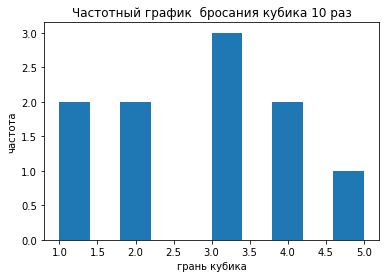

In [159]:
kub=np.random.randint(1,7, size=10)
plt.hist(kub)
plt.xlabel('грань кубика')
plt.ylabel('частота')
plt.title('Частотный график  бросания кубика 10 раз')
plt.show()
#равномерное распределение

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

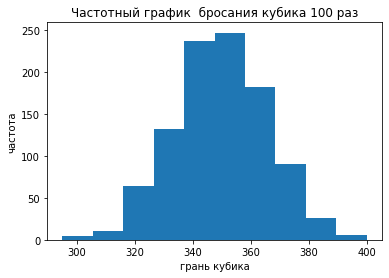

In [166]:
l=[]
for i in range(1000):
    kub=np.random.randint(1,7, size=100)
    sum_kub=kub.sum()
    l.append(sum_kub)

plt.hist(l)
plt.xlabel('грань кубика')
plt.ylabel('частота')
plt.title('Частотный график  бросания кубика 100 раз')
plt.show()

In [ ]:
#В данном случае мы считаем сумму числе 100 бросков,а не отдельные броски кубика,которые выпадают с вероятностью 1/6.
#Чем больше независимых слагаемых в сумме, тем ближе закон ее распределения к нормальному.
#В данном случае при 1000 раз по 100 кубиков(суммы) видел уже нормальный закон распределения.
# применить центральную предельную теорему можно.